# Random Forest Algoritması

## Temel Kavramlar
* Random Forest , karar ağaçlarının toplu öğrenme(ensemble learning) yaklaşımı ile bir araya getirilmesiyle oluşturulan güçlü bir makine öğrenmesi algoritmasıdır.

## Çalışma Prensibi
** Random Forest temel olarak
* Orijinal veri setinden rastgele örneklem alarak(bootsrap sampling) birden çok veri seti oluşturur
* Her alt veri seti için rasgele seçilen özellik alt kümeleriyle karar ağaçlarını inşa eder
* Tüm ağaçların tahminlerini birleştirerek nihai kararı verir. Sınıflandırma problemlerinde çoğunluk oylaması ile ,regresyon problemlerinde ortalama değer ile


## Random Forest'ın Ayrıntılı Yapısı

### Bootsrap Sampling(Torbalama)
** Eğer n örnekten oluşan bir verisetimiz varsa, her ağaç için n örnekten oluşan ve yerine koymalı örnekleme ile seçilen yeni bir veri seti oluşturulur. BU yaklaşım sayesinde
* Ortalama olarak bir veri setinde orijinal örneklerin yaklaşık %63.2 si bulunur
* Geri kalan yaklaşık %36.8'lik kısım(Out-of-Bag örnekler(OOB)) modelin doğrulanması için kullanılabilir

### Rastgele Özellik Seçimi
** Her düğüm bölünmesinde, tüm özellikler yerine rastgele seçilen bir özellik alt kümesi değerlendirilir.
* Sınıflandırma için  genellikle sqrt(p) özellik (p toplam özellik sayısıdır)
* Regresyon için genellikle p/3 özellik

### Karar Ağacı İnşası
** Her ağaç aşağıdaki kriterlere göre bölünmeler yaparak oluşturulur
* Sınıflandırma için-->Gini safsızlığı(impurity) veya entropi
* Regresyon için--> Varyans azaltma veya MSE(ort kare hata)

### Tahmin Birleştirme
* Sınıflandırma--> her ağacın oy hakkı vardır ve en çok oy olan sınıf seçilir(Demokrasi önemli)
* Regresyon--> tüm ağaçların tahminlerinin ortalaması alınır

## Random Forest'ın Avantajları
* 1-)Aşırı öğrenmeye karşı dirençli-->birden çok ağaç kullanıldığı için ve rastgele özellik seçimi sayesinde
* 2-)Yüksek doğruluk-->Genellikle tek bir karar ağacından daha iyi performans gösterir
* 3-)Özellik önem derecelerini belirleyebilme-->Modelin hangi değişkenleri daha önemli bulduğunu gösterir
* 4-)Eksik verilere karşı dayanıklı-->verilerin bir kısmı eksik olsa bile çalışabilir
* 5-)Büyük veri setlerinde etkili-->Paralel işleme(her bir ağacın eğitimi birbirinden tamamen bağımsız olduğu için bu ağaçlar aynı anda yani paralel eğitilir) ile ölçeklenebilir
* 6-)Dengesiz sınıflar için uygun-->Class-weight parametresi ile dengesiz veri problemlerinde de etkili

## Random Forest'ın Dezavantajları
* 1-)Yorumlanabilirliğin azalması--> tek bir karar ağacına göre daha az anlaşılırdır
* 2-)Hesaplama maliyeti-->çok sayıda ağaç için daha fazla hesaplama kaynağı gerektirir
* 3-)Hiperparametre ayarı-->optimal performans için ayarlanması gereken parametreler vardır
* 4-)Zamansal veya sıralı verilerde sınırlı-->Zaman serisi gibi yapılandırılmış verilerde diğer algoritmalara göre daha az etkilidir

## Hiperparametreler
* n_estimators--> oluşturulacak ağac sayısı
* max_depth--> ağaçların maksimum derinliği
* min_samples_split--> bir düğümü bölmek için gereken minimum örnek sayısı
* min_samples_leaf-->bir yaprak düğümde bulunması gereken minimum örnek sayısı
* max_features--> her düğüm bölünmesinde dikkate alınan özellik sayısı
* bootsrap--> bootsrap örnekleme kullanıp kullanılmayacağı

# IRIS VERİ SETİ İKE RANDOM FOREST SINIFLANDIRMA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

In [2]:
#veri setini yükle
df=load_iris()
X=df.data
y=df.target
print(X.shape,y.shape)
#veriti eğitim ve test setlerine ayır
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=31)
#modeli oluştur ve eğit
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=31)
rf_classifier.fit(X_train,y_train)
#tahmin yapma
y_pred=rf_classifier.predict(X_test)

(150, 4) (150,)


In [3]:
#model performansını değerlendirme
print(f"Doğruluk(Accuracy) :{accuracy_score(y_test,y_pred)}")
print("Confusion Matrix :")
cm=confusion_matrix(y_test,y_pred)
cm


Doğruluk(Accuracy) :0.9777777777777777
Confusion Matrix :


array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 14]])

Text(50.722222222222214, 0.5, 'Gerçek')

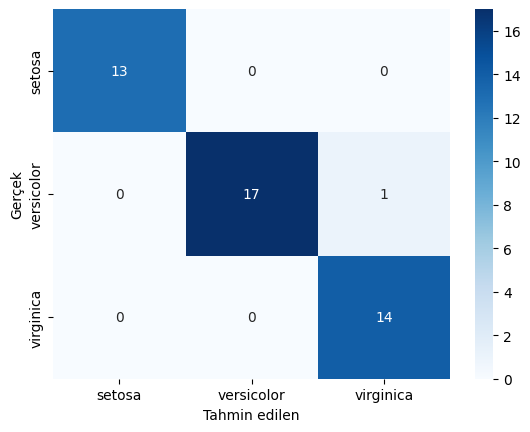

In [4]:
#Concfuision Matrix görselleştirme
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",
            xticklabels=df.target_names,
            yticklabels=df.target_names)
plt.xlabel("Tahmin edilen")
plt.ylabel("Gerçek")

In [5]:
#sınıflandırma raporu
print("classificationr Report :")
print(classification_report(y_test,y_pred,target_names=df.target_names))

classificationr Report :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        18
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Text(0.5, 1.0, 'Özellik önem dereceleri')

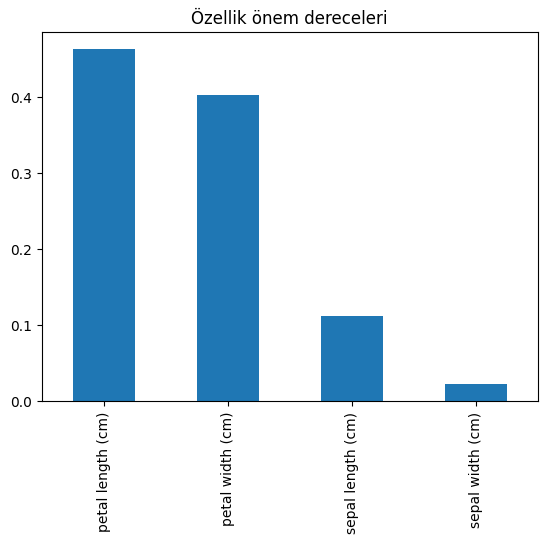

In [6]:
#Özellik önem derecelerini görselleştirme
feature_importance=pd.Series(rf_classifier.feature_importances_,
                             index=df.feature_names)
feature_importance.sort_values(ascending=False).plot(kind="bar")
plt.title("Özellik önem dereceleri")

# Daha Karmaşık Bir Örnek: Wine Quality Veri Seti ile Random Forest Regresyon

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
#Wine quality setini yükle
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine=pd.read_csv(url,sep=";")
#Bağımsız ve hedef değişkenlerini ayır
X=wine.drop("quality",axis=1)
y=wine["quality"]
print(X.shape,y.shape)
#Veriyi test ve eğitim setlerine ayır
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=31)

(1599, 11) (1599,)


In [8]:
#random forest modelini oluştur ve eği
rf_regresor=RandomForestRegressor(n_estimators=100,random_state=31)
rf_regresor.fit(X_train,y_train)
#tahmin yap
y_pred=rf_regresor.predict(X_test)
#model performansını değerlendir
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Ortalama Kare Hata(MSE) :{mse:.4f}")
print(f"R-Kare :{r2:.4f}")
print(f"Kök Ortalam Kare Hata(RMSE) :{np.sqrt(mse):.4f}")

Ortalama Kare Hata(MSE) :0.3252
R-Kare :0.4244
Kök Ortalam Kare Hata(RMSE) :0.5703


Text(0.5, 1.0, 'Random Forest Regresyon: Gerçek vs Tahmin')

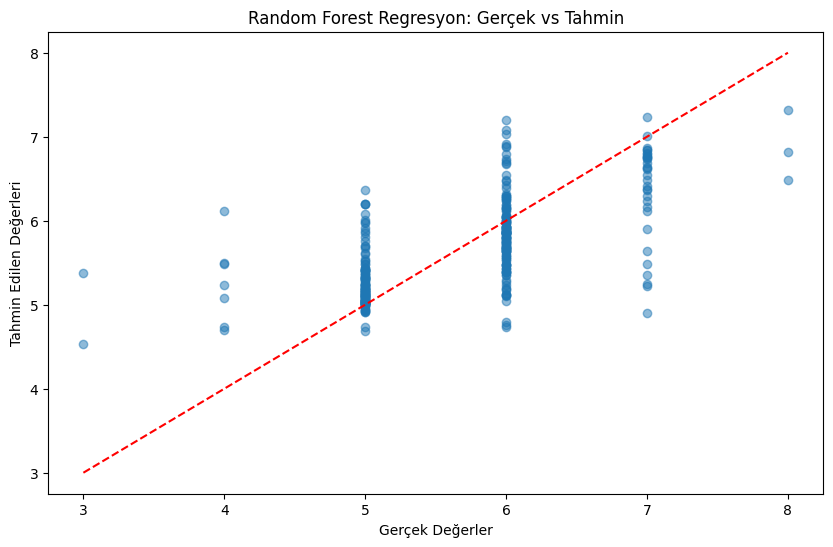

In [9]:
#Tahminleri görselleştir
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerleri")
plt.title("Random Forest Regresyon: Gerçek vs Tahmin")


Text(0.5, 1.0, 'Özellik Önem Dereceleri')

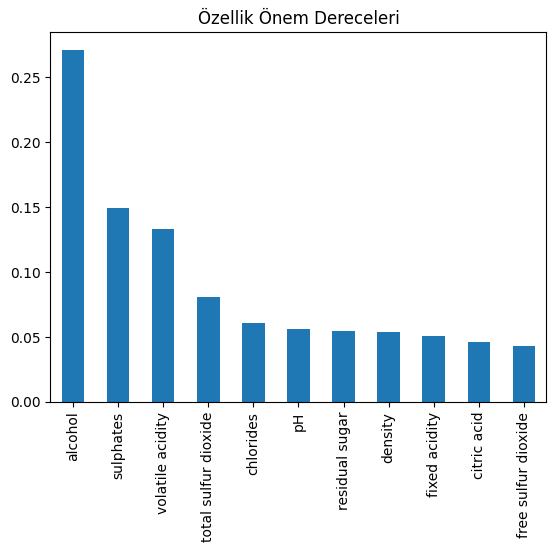

In [10]:
#Özellik önem derecelerini görselleştirme
feature_importance=pd.Series(rf_regresor.feature_importances_,index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar")
plt.title("Özellik Önem Dereceleri")

## Random Forest Hiperparametreleri Optimizasyonu

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "n_estimators":[50,100,200],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "max_features":["sqrt"]
}

#Grid Search ile en iyi parametreleri bul
grid_search=GridSearchCV(estimator=RandomForestRegressor(random_state=31),
                         param_grid=param_grid,
                         cv=5,n_jobs=-1,verbose=1,scoring="r2")
grid_search.fit(X_train,y_train)
#En iyi parametreleri bul ve yazıdr
print(f"En iyi parametreler :{grid_search.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
En iyi parametreler :{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [12]:
#en iyi model ile tahmin yapma
best_rf=grid_search.best_estimator_
y_pred=best_rf.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Ortalama Kare Hata(MSE) :{mse:.4f}")
print(f"R-Kare :{r2:.4f}")
print(f"Kök Ortalam Kare Hata(RMSE) :{np.sqrt(mse):.4f}")

Ortalama Kare Hata(MSE) :0.3069
R-Kare :0.4567
Kök Ortalam Kare Hata(RMSE) :0.5540


## Random Forest ile Anomali Tespiti
* Anomali tespiti yaparken her örneğin karar ağacı derinliğini hesaplarız.Anomaliler genellikle daha derinlerde tespit edilir

In [ ]:
import kagglehub
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud adresinden indirilebilir




/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/ozguncan/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3
Dosyalar: ['creditcard.csv']


In [14]:
print("Veri seti boyutu:",df.shape)
# Veri setinin ilk birkaç satırını göster
df.head()

Veri seti boyutu: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
#Veri seti özeti
print("Sınıf dağılımı (Hileli işlemler 1 hilesizler 0):")
print(df["Class"].value_counts())
print(f"Sahtekarlık oranı : {df["Class"].mean()*100:.4f}")

Sınıf dağılımı (Hileli işlemler 1 hilesizler 0):
Class
0    284315
1       492
Name: count, dtype: int64
Sahtekarlık oranı : 0.1727


In [16]:
#veriyi hazırla
X=df.drop("Class",axis=1)
y=df["Class"]
print(X.shape,y.shape)
#Eğitim ve test setlerine ayırm
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=31)
#Standartlaştırma
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

(284807, 30) (284807,)


In [17]:

# Random Forest ile anomali tespiti için fonksiyon
def compute_anomaly_scores_rf(X_train, y_train, X_test, contamination=0.01):
    # Normal örnekleri kullanarak model eğitme (yalnızca Class=0 örnekleri)
    normal_idx = np.where(y_train == 0)[0]
    X_train_normal = X_train[normal_idx]
    
    # Random Forest sınıflandırıcısı
    rf = RandomForestClassifier(n_estimators=100, max_samples=0.8, random_state=42)
    rf.fit(X_train_normal, np.zeros(len(X_train_normal)))  # Tüm normal verileri 0 sınıfı olarak eğitme
    
    # Leaf node'ları takip etmek için
    leaf_indices = rf.apply(X_test)
    
    # Her bir test örneği için anomali skoru hesaplama
    depths = np.zeros(X_test.shape[0])
    proximities = np.zeros(X_test.shape[0])
    
    # Her bir test örneği için ağaç derinliklerini hesaplama
    for tree_idx in range(rf.n_estimators):
        tree = rf.estimators_[tree_idx].tree_
        
        # Yaprak düğüm derinliği matrisi
        node_depth = np.zeros(tree.node_count, dtype=np.int64)
        
        # Derinlikleri hesaplama (bir DFS algoritması kullanarak)
        def compute_depth(node_id, depth):
            node_depth[node_id] = depth
            
            if tree.children_left[node_id] != tree.children_right[node_id]:  # Yaprak değilse
                compute_depth(tree.children_left[node_id], depth + 1)
                compute_depth(tree.children_right[node_id], depth + 1)
                
        compute_depth(0, 0)  # Kök düğümden başlayarak derinlikleri hesapla
        
        # Her örnek için bu ağaçtaki yaprak düğüm derinliğini ekle
        for sample_idx in range(X_test.shape[0]):
            leaf_id = leaf_indices[sample_idx, tree_idx]
            depths[sample_idx] += node_depth[leaf_id]
    
    # Ortalama derinliği hesaplama
    depths /= rf.n_estimators
    
    # Anomali skorunu normalize etme - daha yüksek değerler daha anomal
    anomaly_scores = depths / np.max(depths)
    
    # Eşik değeri belirleyerek anomalileri tespit etme
    threshold = np.percentile(anomaly_scores, 100 * (1 - contamination))
    
    # Anomali tahmini (1: anomali, 0: normal)
    anomaly_predictions = (anomaly_scores > threshold).astype(int)
    
    return anomaly_scores, anomaly_predictions, threshold

#Karşılaştırma için IsolationForest
def isolation_forest_detection(X_train,y_train,X_test,contamination=0.01):
    #normal örnekleri kullanrak model eğitme
    normal_idx=np.where(y_train==0)[0]
    X_train_normal=X_train[normal_idx]

    #Isolation Forest Modeli
    iso_forest=IsolationForest(n_estimators=100,contamination=contamination,random_state=31)
    iso_forest.fit(X_train_normal)

    #Anomali skorlarını hesaplama(-1 anomali,1 normal)
    anomaly_scores=-iso_forest.score_samples(X_test)#negatifini alarak yüksek değerlerin anomalli olmasını sağlıyoruz
    anomaly_predictions=(iso_forest.predict(X_test)==-1).astype(int)

    return anomaly_scores,anomaly_predictions

#random forest ile anomaly tespiti
rf_scores,rf_preds,rf_threshold=compute_anomaly_scores_rf(X_train_scaled,y_train,X_test_scaled,contamination=0.002)
#Isolation Forest ile anomali tespiti
iso_scores,ıso_preds=isolation_forest_detection(X_train_scaled,y_train,X_test_scaled,contamination=0.002)




In [18]:
##Sonuçları Değerlendirme
print("---Random Forest Anomali Tespiti Sonuçları---")
print(classification_report(y_test,rf_preds))
print("confusion_matrix :")
print(confusion_matrix(y_test,rf_preds))

---Random Forest Anomali Tespiti Sonuçları---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.00      0.00      0.00       158

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

confusion_matrix :
[[85285     0]
 [  158     0]]


In [19]:
print("IsolationForest Anomali Tespiti Sonuçları")
print(classification_report(y_test,ıso_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test,ıso_preds))

IsolationForest Anomali Tespiti Sonuçları
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.24      0.33      0.27       158

    accuracy                           1.00     85443
   macro avg       0.62      0.66      0.64     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85116   169]
 [  106    52]]


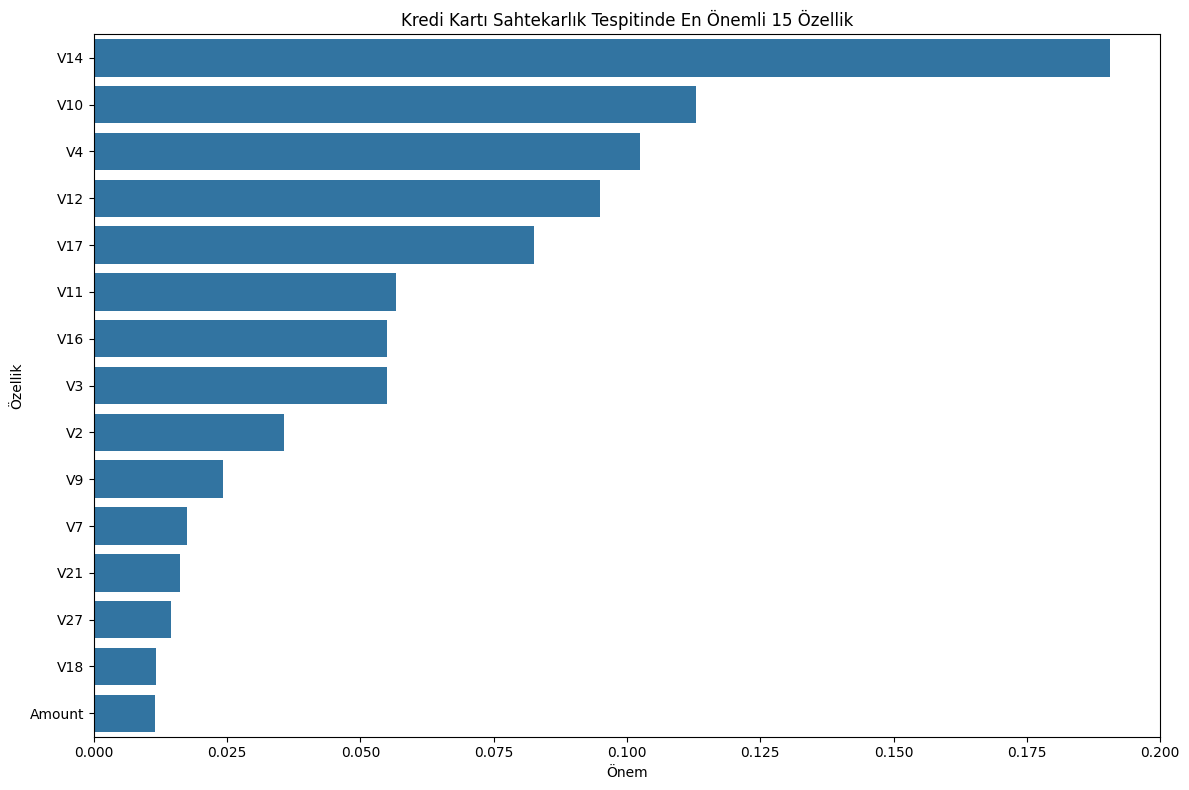

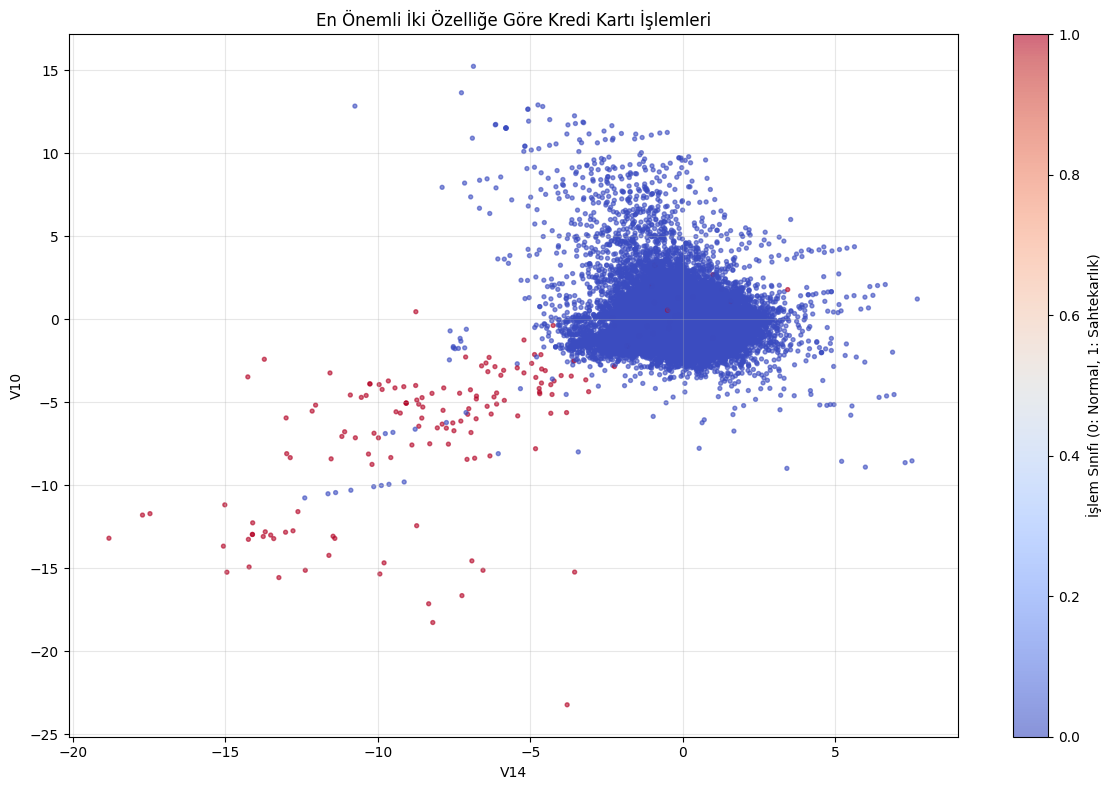

In [23]:


# Özellik önem derecelerini görmek için bir Random Forest sınıflandırıcı eğitelim
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)

# Özellik önem derecelerini görselleştirme
feature_importance = pd.DataFrame({
    'Özellik': X.columns,
    'Önem': rf_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('Önem', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Önem', y='Özellik', data=feature_importance.head(15))
plt.title('Kredi Kartı Sahtekarlık Tespitinde En Önemli 15 Özellik')
plt.tight_layout()
plt.show()

# En önemli özelliklere göre verileri görselleştirme
top_features = feature_importance['Özellik'].head(2).values
plt.figure(figsize=(12, 8))
plt.scatter(
    X_test[top_features[0]], 
    X_test[top_features[1]], 
    c=y_test, 
    cmap='coolwarm', 
    alpha=0.6, 
    s=8
)
plt.title(f'En Önemli İki Özelliğe Göre Kredi Kartı İşlemleri')
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.colorbar(label='İşlem Sınıfı (0: Normal, 1: Sahtekarlık)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()